In [2]:
import pandas as pd

/var/folders/ld/s5_rrf_n32q9rltztl0sz_fh0000gn/T/ipykernel_40965/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('/Users/bididudy/Downloads/scaled_cleaned.csv')

In [4]:
df.columns

Index(['car_code', 'Propulsion_Combustion', 'Propulsion_Electric',
       'Propulsion_Hybrid', 'Propulsion_Light Hybrid',
       'Propulsion_Plug-in hybrid', 'Car gearbox_Automated',
       'Car gearbox_Automatic', 'Car gearbox_CVT', 'Car gearbox_Manual',
       ...
       'Maximum power', 'Unit displacement', 'Trunk', 'USB connection',
       'Gear speed transmissions', 'Urban', 'Year', 'Radio',
       'Folding rear seat', 'Perimeter anti theft alarm'],
      dtype='object', length=101)

In [5]:
prices_relevant_df=pd.read_csv('/Users/bididudy/code/marcnaweb/car_recommendation_engine/raw_data/car_prices_enriched_v3_carPriceIndex.csv')

In [6]:
price_df=prices_relevant_df[['car_code', 'car_last_price_in_brl']]

In [7]:
merged_df = pd.merge(df, price_df, how='left', on='car_code')

In [9]:
merged_df.columns

Index(['car_code', 'Propulsion_Combustion', 'Propulsion_Electric',
       'Propulsion_Hybrid', 'Propulsion_Light Hybrid',
       'Propulsion_Plug-in hybrid', 'Car gearbox_Automated',
       'Car gearbox_Automatic', 'Car gearbox_CVT', 'Car gearbox_Manual',
       ...
       'Unit displacement', 'Trunk', 'USB connection',
       'Gear speed transmissions', 'Urban', 'Year', 'Radio',
       'Folding rear seat', 'Perimeter anti theft alarm',
       'car_last_price_in_brl'],
      dtype='object', length=102)

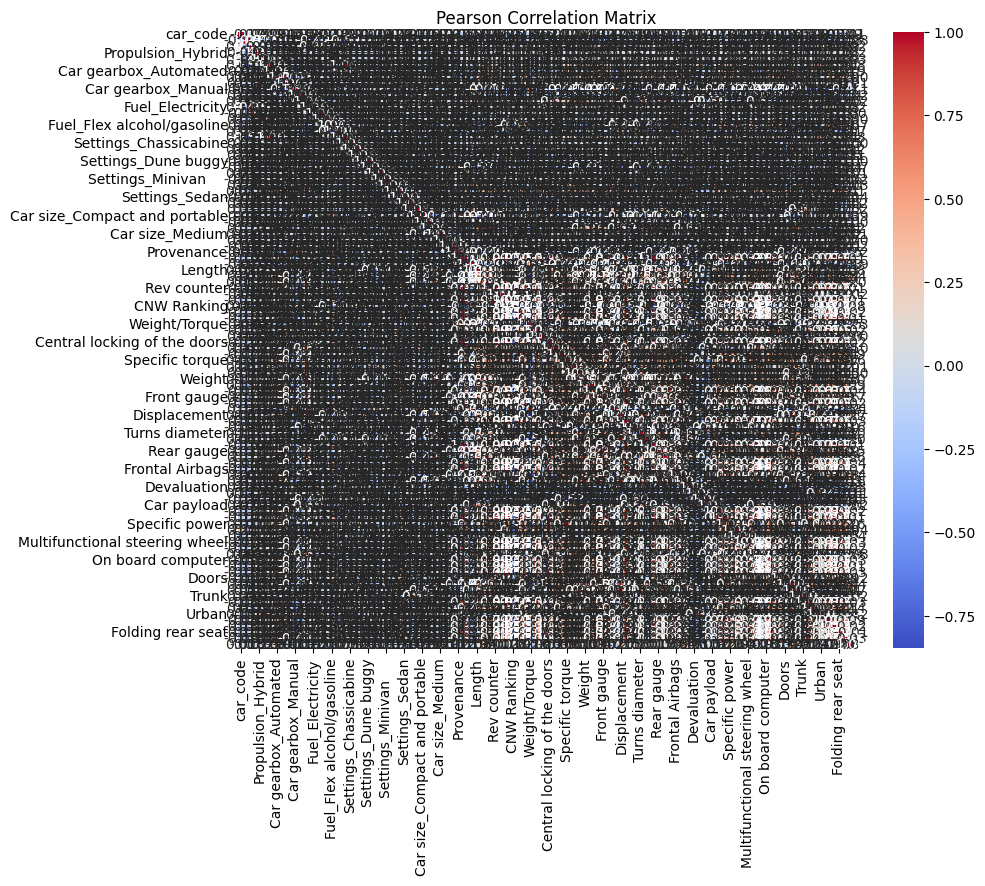

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the Pearson correlation matrix
correlation_matrix = merged_df.corr(method='pearson')

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Pearson Correlation Matrix')
plt.show()

In [11]:
correlation_matrix

,car_code,Propulsion_Combustion,Propulsion_Electric,Propulsion_Hybrid,Propulsion_Light Hybrid,Propulsion_Plug-in hybrid,Car gearbox_Automated,Car gearbox_Automatic,Car gearbox_CVT,Car gearbox_Manual,...,Unit displacement,Trunk,USB connection,Gear speed transmissions,Urban,Year,Radio,Folding rear seat,Perimeter anti theft alarm,car_last_price_in_brl
car_code,1.000000,-0.170284,0.097115,0.038882,0.101096,0.094309,-0.040617,0.061543,0.045123,-0.053208,...,0.053592,0.047605,-0.084220,0.028758,0.096853,-0.031631,-0.134976,-0.139416,-0.091663,0.006943
Propulsion_Combustion,-0.170284,1.000000,-0.506195,-0.420531,-0.464416,-0.573998,-0.055026,-0.102355,-0.119583,0.177833,...,-0.031108,0.001991,-0.183900,0.023670,-0.359342,-0.197221,-0.166544,-0.153959,-0.184667,-0.078942
Propulsion_Electric,0.097115,-0.506195,1.000000,-0.006428,-0.007099,-0.008774,-0.028305,0.119137,-0.018377,-0.090018,...,0.003472,0.020342,0.096582,-0.286011,0.055606,0.104187,0.087202,0.075297,0.085694,0.017467
Propulsion_Hybrid,0.038882,-0.420531,-0.006428,1.000000,-0.005898,-0.007289,-0.003010,-0.051175,0.313292,-0.074784,...,0.030756,-0.007093,0.073565,-0.073475,0.221927,0.072431,0.065801,0.061316,0.076543,0.018157
Propulsion_Light Hybrid,0.101096,-0.464416,-0.007099,-0.005898,1.000000,-0.008050,0.058715,0.050067,0.001192,-0.082588,...,0.013293,-0.008627,0.087401,0.146538,0.021578,0.096074,0.078801,0.078112,0.090715,0.033872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year,-0.031631,-0.197221,0.104187,0.072431,0.096074,0.113450,0.213920,0.228394,0.172406,-0.412161,...,-0.048361,0.067271,0.710980,0.450967,0.048480,1.000000,0.724905,0.671203,0.645978,0.091254
Radio,-0.134976,-0.166544,0.087202,0.065801,0.078801,0.094971,0.188822,0.248665,0.155478,-0.410119,...,-0.048798,-0.026926,0.889494,0.370761,0.053687,0.724905,1.000000,0.852635,0.827617,0.019620
Folding rear seat,-0.139416,-0.153959,0.075297,0.061316,0.078112,0.087859,0.143255,0.251278,0.163920,-0.389416,...,-0.089239,-0.113781,0.766947,0.317553,0.047922,0.671203,0.852635,1.000000,0.781507,-0.006971
Perimeter anti theft alarm,-0.091663,-0.184667,0.085694,0.076543,0.090715,0.109677,0.203536,0.288858,0.188344,-0.470286,...,-0.007980,-0.066616,0.771761,0.414640,0.039129,0.645978,0.827617,0.781507,1.000000,0.032850


In [12]:
import os

# Define the file path to the 'Downloads' directory
downloads_directory = os.path.expanduser('~/Downloads')

# Specify the full file path for saving the CSV file
csv_file_path = os.path.join(downloads_directory, 'df_11.csv')

# Save the DataFrame to the CSV file
merged_df.to_csv(csv_file_path, index=False)

In [13]:
nan_percentage_per_column = merged_df.isnull().mean() * 100

# Create a new DataFrame with column names and NaN percentages and Dtypes
nan_info_df = pd.DataFrame({
    'Column Name': nan_percentage_per_column.index,
    'NaN Percentage': nan_percentage_per_column.values,
    'Data Type': merged_df.dtypes
})

# Display the new DataFrame
nan_info_df[0:50] # Cheking 50 by 50 to see whole list at a time.

,Column Name,NaN Percentage,Data Type
car_code,car_code,0.0,int64
Propulsion_Combustion,Propulsion_Combustion,0.0,float64
Propulsion_Electric,Propulsion_Electric,0.0,float64
Propulsion_Hybrid,Propulsion_Hybrid,0.0,float64
Propulsion_Light Hybrid,Propulsion_Light Hybrid,0.0,float64
Propulsion_Plug-in hybrid,Propulsion_Plug-in hybrid,0.0,float64
Car gearbox_Automated,Car gearbox_Automated,0.0,float64
Car gearbox_Automatic,Car gearbox_Automatic,0.0,float64
Car gearbox_CVT,Car gearbox_CVT,0.0,float64
Car gearbox_Manual,Car gearbox_Manual,0.0,float64


In [14]:
def round_df_floats_to_three_digits(df):
    for col in df.select_dtypes(include=['float64']):
        df[col] = df[col].round(3)
    return df

In [15]:
# Apply the function
df = round_df_floats_to_three_digits(merged_df)

In [16]:
# Define the file path to the 'Downloads' directory
downloads_directory = os.path.expanduser('~/Downloads')

# Specify the full file path for saving the CSV file
csv_file_path = os.path.join(downloads_directory, 'df_12.csv')

# Save the DataFrame to the CSV file
df.to_csv(csv_file_path, index=False)

In [17]:
df_cleaned = df.dropna()
df_cleaned.shape

(20699, 102)

In [20]:
from sklearn.ensemble import RandomForestRegressor # or RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming df_12_cleaned is your DataFrame and 'target' is the name of your target variable
X = df_cleaned.drop(columns=['car_last_price_in_brl','car_code']) # Replace 'target' with the actual target column name
y = df_cleaned['car_last_price_in_brl'] # Replace 'target' with the actual target column name

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = RandomForestRegressor(random_state=42) # Use RandomForestClassifier for classification tasks
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Print the feature importances
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)


Maximum speed                4.249926e-01
CNW Index                    6.239785e-02
Maximum power                5.887588e-02
CNW Ranking                  4.107175e-02
Acceleration                 3.998438e-02
                                 ...     
Fuel_Flex                    8.161869e-10
Fuel_Alcohol                 7.518874e-10
Fuel_Electricity/gasoline    2.553800e-10
Settings_Dune buggy          2.589972e-13
Car size_Coupe               0.000000e+00
Length: 100, dtype: float64


In [24]:
# Assuming `feature_importances` is your pandas Series with feature importances
top_20_features = feature_importances.head(20)

# Display the top 30 features
print(top_20_features)

Maximum speed      0.424993
CNW Index          0.062398
Maximum power      0.058876
CNW Ranking        0.041072
Acceleration       0.039984
Height             0.038675
Weight/power       0.038473
Fuel tank          0.034977
Maximum torque     0.032547
Price R            0.021577
Width              0.020924
Specific power     0.017483
Weight             0.015736
Year               0.015073
Length             0.013695
Rear gauge         0.012712
Weight/Torque      0.011226
Trunk              0.010563
Sidewall height    0.009882
Urban              0.008659
dtype: float64


In [25]:
type(top_20_features)

pandas.core.series.Series

In [28]:
top_20_features.index

Index(['Maximum speed', 'CNW Index', 'Maximum power', 'CNW Ranking',
       'Acceleration', 'Height', 'Weight/power', 'Fuel tank', 'Maximum torque',
       'Price R', 'Width', 'Specific power', 'Weight', 'Year', 'Length',
       'Rear gauge', 'Weight/Torque', 'Trunk', 'Sidewall height', 'Urban'],
      dtype='object')

In [4]:
df = pd.read_csv('/Users/bididudy/Downloads/scaled_cleaned.csv')
df.columns

Index(['car_code', 'Propulsion_Combustion', 'Propulsion_Electric',
       'Propulsion_Hybrid', 'Propulsion_Light Hybrid',
       'Propulsion_Plug-in hybrid', 'Car gearbox_Automated',
       'Car gearbox_Automatic', 'Car gearbox_CVT', 'Car gearbox_Manual',
       ...
       'Maximum power', 'Unit displacement', 'Trunk', 'USB connection',
       'Gear speed transmissions', 'Urban', 'Year', 'Radio',
       'Folding rear seat', 'Perimeter anti theft alarm'],
      dtype='object', length=101)

In [5]:
prices_relevant_df=pd.read_csv('/Users/bididudy/code/marcnaweb/car_recommendation_engine/raw_data/car_prices_enriched_v3_carPriceIndex.csv')

In [7]:
prices_relevant_df.columns

Index(['Unnamed: 0', 'car_code', 'car_last_price_in_brl', 'car_manufacturer',
       'car_model', 'car_model_year', 'first_year_of_tracking',
       'last_factory_price', 'last_factory_price_year', 'year_01', 'year_02',
       'year_03', 'year_04', 'year_05', 'year_06', 'year_07', 'year_08',
       'year_09', 'year_10', 'year_11', 'year_12', 'year_13', 'year_14',
       'year_15', 'year_16', 'year_17', 'year_18', 'year_19', 'year_20',
       'new_car_ajustment_index', 'new_car_price_ajusted',
       'first_year_of_tracking_index', 'year_01_ajusted', 'year_02_ajusted',
       'year_03_ajusted', 'year_04_ajusted', 'year_05_ajusted',
       'year_06_ajusted', 'year_07_ajusted', 'year_08_ajusted',
       'year_09_ajusted', 'year_10_ajusted', 'year_11_ajusted',
       'year_12_ajusted', 'year_13_ajusted', 'year_14_ajusted',
       'year_15_ajusted', 'year_16_ajusted', 'year_17_ajusted',
       'year_18_ajusted', 'year_19_ajusted', 'year_20_ajusted', 'year_00_pc',
       'year_01_pc', 'year_

In [8]:
price_df=prices_relevant_df[['car_code', 'car_model']]

In [12]:
price_df['car_model'].nunique()

6375

In [13]:
merged_df = pd.merge(df, price_df, how='left', on='car_code')


In [16]:
# Find unique values in 'car_model' column
unique_car_models_df = merged_df.drop_duplicates(subset=['car_model'])

In [18]:
import os

# Define the file path to the 'Downloads' directory
downloads_directory = os.path.expanduser('~/Downloads')

# Specify the full file path for saving the CSV file
csv_file_path = os.path.join(downloads_directory, 'unique_car_models_df.csv')

# Save the DataFrame to the CSV file
unique_car_models_df.to_csv(csv_file_path, index=False)

## For Mahdi

In [55]:
unique_car_models_df.set_index("car_code")

,Propulsion_Combustion,Propulsion_Electric,Propulsion_Hybrid,Propulsion_Light Hybrid,Propulsion_Plug-in hybrid,Car gearbox_Automated,Car gearbox_Automatic,Car gearbox_CVT,Car gearbox_Manual,Fuel_Alcohol,...,Unit displacement,Trunk,USB connection,Gear speed transmissions,Urban,Year,Radio,Folding rear seat,Perimeter anti theft alarm,car_model
car_code,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.517060,0.003001,0.0,0.545455,0.002481,0.607143,0.0,0.0,0.0,Murcielago 6.2 V12
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.249986,0.019006,0.0,0.454545,0.191067,0.607143,0.0,0.0,0.0,Uno Mille Fire 1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.500995,0.024341,0.0,0.454545,0.121588,0.607143,0.0,0.0,0.0,Astra Sport 2.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.445773,0.021674,0.0,0.454545,0.111663,0.607143,0.0,0.0,0.0,Golf GTi 1.8 Turbo
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.437741,0.024341,0.0,0.454545,0.166253,0.607143,0.0,0.0,0.0,Brava HGT 1.8 16V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23616,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.625495,0.029010,0.0,0.363636,0.156328,0.660714,0.0,0.0,0.0,Sorento LX 2.5 Diesel 4x4 AT
23660,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.499991,0.030744,1.0,0.727273,0.215881,0.982143,1.0,1.0,1.0,Sentra Exclusive Premium 2.0
23661,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.499991,0.009670,1.0,0.636364,0.037221,0.964286,1.0,0.0,1.0,765LT Spider 4.0 V8


In [61]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame and 'selected_features' is a list of columns you're interested in
selected_features = ['Maximum speed', 'CNW Index', 'Maximum power', 'CNW Ranking',
       'Acceleration', 'Height', 'Weight/power', 'Fuel tank', 'Maximum torque',
       'Price R', 'Width', 'Specific power', 'Weight', 'Year', 'Length',
       'Rear gauge', 'Weight/Torque', 'Trunk', 'Sidewall height', 'Urban']
X_selected = unique_car_models_df[selected_features]

# Compute the cosine similarity matrix for the selected features
cos_sim_matrix_selected = cosine_similarity(X_selected)

print(unique_car_models_df.columns)

Index(['car_code', 'Propulsion_Combustion', 'Propulsion_Electric',
       'Propulsion_Hybrid', 'Propulsion_Light Hybrid',
       'Propulsion_Plug-in hybrid', 'Car gearbox_Automated',
       'Car gearbox_Automatic', 'Car gearbox_CVT', 'Car gearbox_Manual',
       ...
       'Unit displacement', 'Trunk', 'USB connection',
       'Gear speed transmissions', 'Urban', 'Year', 'Radio',
       'Folding rear seat', 'Perimeter anti theft alarm', 'car_model'],
      dtype='object', length=102)


In [22]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

In [58]:
def find_similar_cars_and_compare_features(car_index, cos_sim_matrix, data, num_results=5):
    # Find indices of similar cars (excluding the first one as it's the reference car itself)
    sim_scores = list(enumerate(cos_sim_matrix[car_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_results+1]
    car_indices = [i[0] for i in sim_scores]

    # Retrieve the similar cars' selected features
    similar_cars = data.iloc[car_indices][selected_features]

    # Retrieve the reference car's features for comparison
    reference_features = data.iloc[car_index][selected_features]

    # Calculate the differences
    differences = similar_cars.subtract(reference_features.values, axis='columns')

    return similar_cars, differences

# Example: Assume you want to compare cars similar to the car at index 0
similar_cars, differences = find_similar_cars_and_compare_features(1, cos_sim_matrix_selected, unique_car_models_df, num_results=5)

print("Similar Cars' Features:")
print(similar_cars)
print("\nDifferences from Reference Car:")
print(differences)


Similar Cars' Features:
       Maximum speed  CNW Index  Maximum power  CNW Ranking  Acceleration  \
438         0.129808   0.058398       0.012707     0.736756      0.257603   
4194        0.132212   0.058708       0.013812     0.734256      0.279070   
52          0.122596   0.057727       0.012155     0.742092      0.277281   
439         0.122596   0.059539       0.013812     0.726421      0.277281   
15236       0.141827   0.063903       0.019337     0.689405      0.230769   

         Height  Weight/power  Fuel tank  Maximum torque   Price R     Width  \
438    0.164294      0.406872   0.138790        0.018076  0.010598  0.268966   
4194   0.164294      0.328597   0.145907        0.016327  0.007077  0.193103   
52     0.150468      0.417205   0.149466        0.018076  0.009581  0.275862   
439    0.150468      0.380780   0.149466        0.018659  0.009905  0.275862   
15236  0.164294      0.357789   0.138790        0.034985  0.013181  0.275862   

       Specific power    Weight 

In [67]:
unique_car_models_df[unique_car_models_df['car_code']== 52]

,car_code,Propulsion_Combustion,Propulsion_Electric,Propulsion_Hybrid,Propulsion_Light Hybrid,Propulsion_Plug-in hybrid,Car gearbox_Automated,Car gearbox_Automatic,Car gearbox_CVT,Car gearbox_Manual,...,Unit displacement,Trunk,USB connection,Gear speed transmissions,Urban,Year,Radio,Folding rear seat,Perimeter anti theft alarm,car_model
49,52,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.534128,0.009336,0.0,0.454545,0.1067,0.589286,0.0,0.0,0.0,SLK 320 3.2 V6
